Importing the data set GTZAN from "http://marsyas.info/downloads/datasets.html"

  The GTZAN genre collection dataset was collected in 2000-2001. It consists of 1000 audio files each having 30 seconds duration. There are 10 classes ( 10 music genres) each containing 100 audio tracks. Each track is in .wav format. It contains audio files of the following 10 genres:

1.   Classical
2.   Country
3.   Disco
4.   Hiphop
5.   Jazz
6.   Metal
7.   Pop
8.   Reggae
9.   Rock



In [1]:
!wget "http://opihi.cs.uvic.ca/sound/genres.tar.gz"

--2021-04-15 00:05:20--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G  2.10MB/s    in 10m 29s 

2021-04-15 00:15:50 (1.86 MB/s) - ‘genres.tar.gz’ saved [1225571541/1225571541]



In [2]:
!tar -xvf genres.tar.gz

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/rock.00006.wav
genres/rock/rock.00007.wav
genres/rock/rock.00008.wav
genres/rock/rock.00009.wav
genres/rock/rock.00010.wav
genres/rock/rock.00011.wav
genres/rock/rock.00012.wav
genres/rock/rock.00013.wav
genres/rock/rock.00014.wav
genres/rock/rock.00015.wav
genres/rock/rock.00016.wav
genres/rock/rock.00017.wav
genres/rock/rock.00018.wav
genres/rock/rock.00019.wav
genres/rock/rock.00020.wav
genres/rock/rock.00021.wav
genres/rock/rock.00022.wav
genres/rock/rock.00023.wav
genres/rock/rock.00024.wav
g

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

**Librosa** :
  It is a Python module to analyze audio signals in general but geared more towards music. It provides the building blocks necessary to create or build a MIR(Music information retrieval) system. 
  It has been very well documented along with a lot of examples and tutorials at https://librosa.org/doc/latest/index.html

In [4]:
import librosa, IPython
import librosa.display

**Load a sample audio file:**

  This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. The sample rate is the number of samples of audio carried per second, measured in Hz or kHz.


In [5]:
single_audio_file = "/content/genres/blues/blues.00001.wav"
signal , sr = librosa.load(single_audio_file)

In [6]:
print(type(signal), type(sr))
print(signal.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


An audio widget in the colab as follows, you can also play the audio file here

In [7]:
import IPython.display as ipd
ipd.Audio(single_audio_file)

**Visualizing Audio:**
*WaveForm*

We can plot the audio array using librosa.display.waveplot()

Here, we have the plot of the amplitude envelope of a waveform.

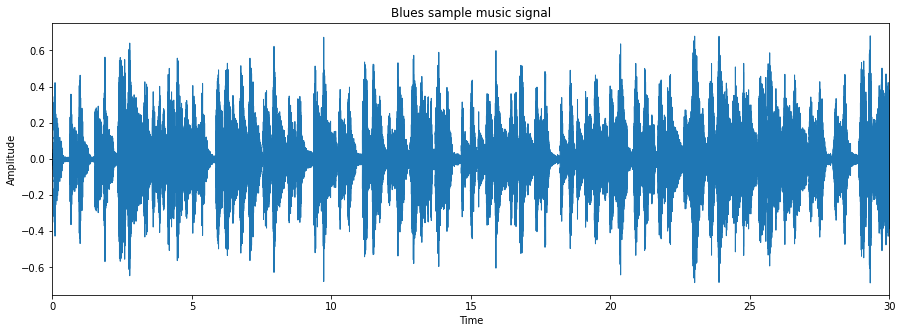

In [8]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(signal , sr = sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Blues sample music signal")
plt.show()

**Spectrogram**:

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time.

We can display a spectrogram using. librosa.display.specshow()

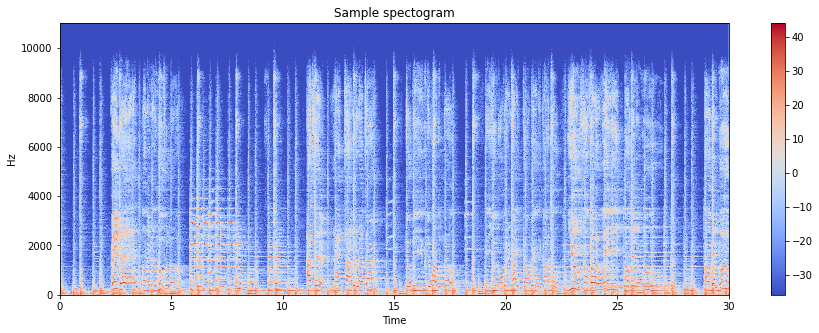

In [9]:
sample_spectogram = librosa.stft(signal)
sample_spectogram_db = librosa.amplitude_to_db(abs(sample_spectogram))
plt.figure(figsize=(15, 5))
librosa.display.specshow(sample_spectogram_db, sr=sr, x_axis='time', y_axis='hz')
plt.title("Sample spectogram")
plt.colorbar()

The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic scale.

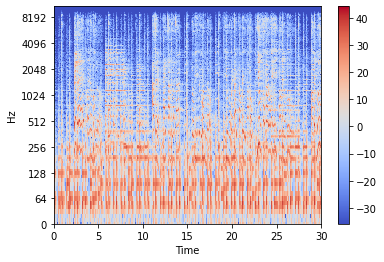

In [ ]:
librosa.display.specshow(sample_spectogram_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

**Feature extraction from Audio signal:**

  Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. 

  The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc. Let us study a few of the features in detail.
  




**Spectral centroid:**

Spectral centroid indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. 

Consider two songs, one from a blues genre and the other belonging to metal. 
Now as compared to the blues genre song which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.

librosa.feature.spectral_centroid computes the spectral centroid for each frame in a signal:

**Below is the visualization of Spectral_centroid of blues sample:**

In [10]:
# spectral_centroid will return an array with columns equal to the number of frames present in your sample.

spectral_centroids = librosa.feature.spectral_centroid(signal, sr=sr)[0]
spectral_centroids

array([ 886.23526604, 1052.00867533, 1125.26706995, ..., 2048.36999725,
       2009.18596951, 1864.30224658])

In [11]:
# Computing the time variable for visualization

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
t

array([0.00000000e+00, 2.32199546e-02, 4.64399093e-02, ...,
       2.99537415e+01, 2.99769615e+01, 3.00001814e+01])

In [12]:
# Normalising the spectral centroid for visualization

def normalize(signal, axis=0):
    return sklearn.preprocessing.minmax_scale(signal, axis=axis)


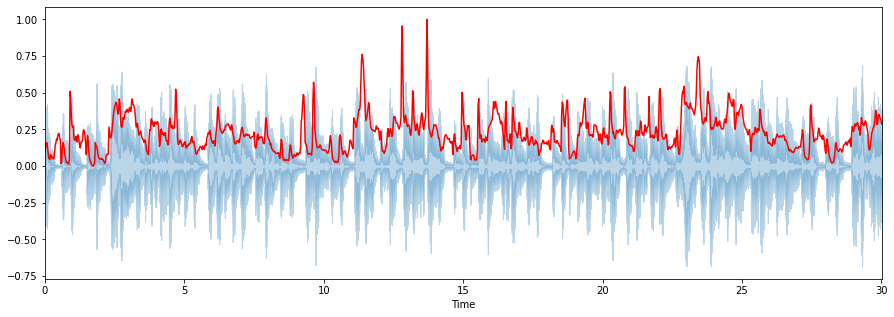

In [13]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(15, 5))

librosa.display.waveplot(signal, sr=sr, alpha = 0.3)
plt.plot(t, normalize(spectral_centroids), color='r')

There is a rise in the spectral centroid at the centre for blues.





**Below is the visualization of Spectral_centroid of metal sample:**

In [14]:
# loading a sample of metal audio file

metal_audio_file = "/content/genres/metal/metal.00001.wav"
metal_signal , metal_sr = librosa.load(metal_audio_file)

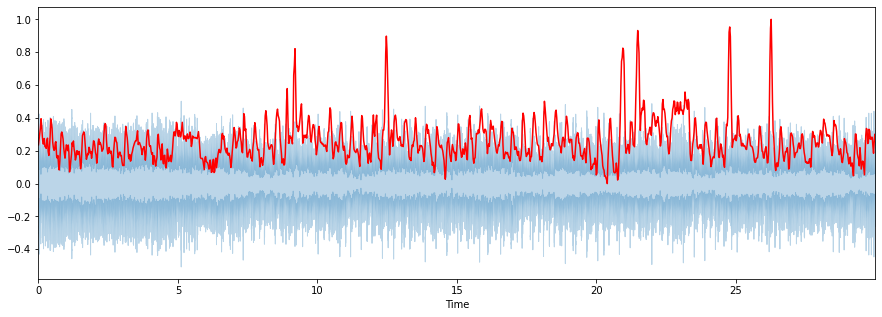

In [15]:
# spectral_centroid will return an array with columns equal to the number of frames present in your sample.

metal_spectral_centroids = librosa.feature.spectral_centroid(metal_signal, sr=metal_sr)[0]

# Computing the time variable for visualization

metal_frames = range(len(metal_spectral_centroids))
metal_t = librosa.frames_to_time(metal_frames)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(15, 5))

librosa.display.waveplot(metal_signal, sr=metal_sr, alpha = 0.3)
plt.plot(metal_t, normalize(metal_spectral_centroids), color='r')

There is a rise in the spectral centroid towards the end.




**Zero Crossing Rate:**

  The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. 
  
  It usually has higher values for highly percussive sounds like those in metal and rock.


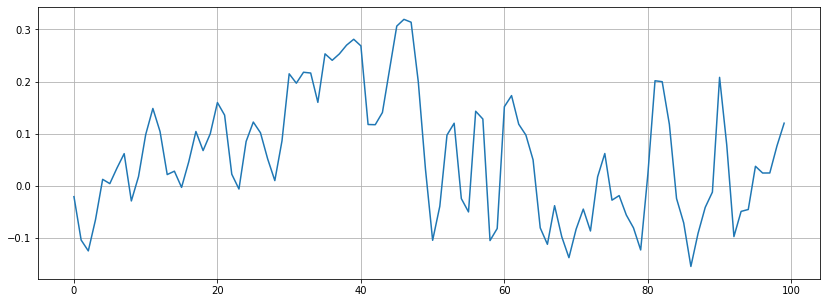

In [16]:
# Zooming in metal

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(metal_signal[n0:n1])
plt.grid()

In [17]:
zero_crossings = librosa.zero_crossings(metal_signal[n0:n1], pad=False)
print(sum(zero_crossings))

21


In [18]:
# loading a sample of Rock audio file
rock_audio_file = "/content/genres/rock/rock.00000.wav"
rock_signal , rock_sr = librosa.load(rock_audio_file)

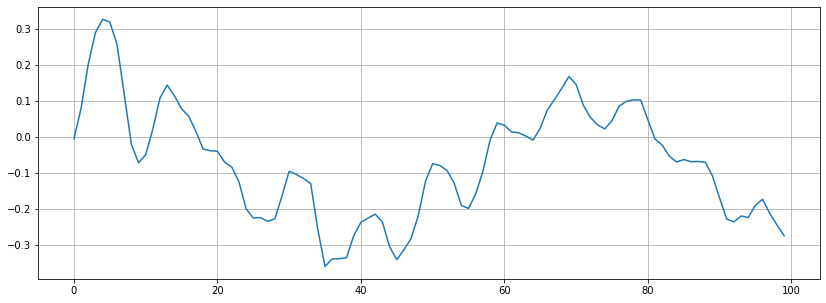

In [19]:
# Zooming in Rock

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(rock_signal[n0:n1])
plt.grid()

In [20]:
rock_zero_crossings = librosa.zero_crossings(rock_signal[n0:n1], pad=False)
print(sum(rock_zero_crossings))

8


**Spectral Rolloff:**

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal:


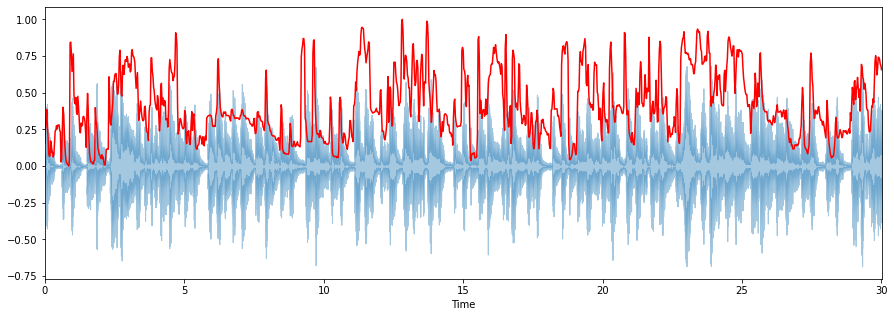

In [21]:
spectral_rolloff = librosa.feature.spectral_rolloff(signal+0.01, sr=sr)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveplot(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

**Mel-Frequency Cepstral Coefficients(MFCCs)**:

  The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.



(20, 1293)


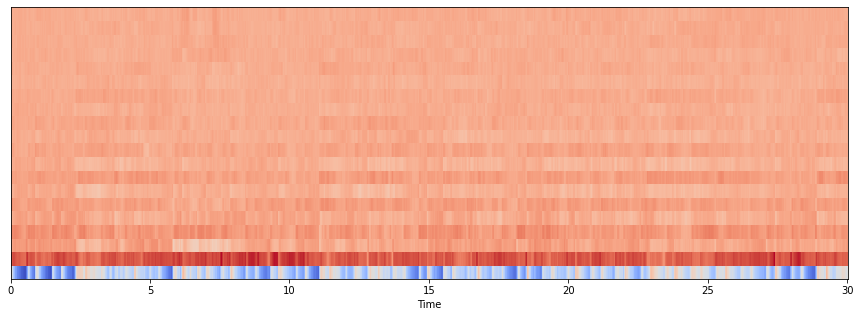

In [22]:
mfccs = librosa.feature.mfcc(signal, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Here mfcc computed 20 MFCC s over 1293 frames.


**Chroma features**:

Chroma features are an interesting and powerful vector representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave in other words it simple indicates how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal . In short, It provides a robust way to describe a similarity measure between music pieces.


librosa.feature.chroma_stft is used for computation



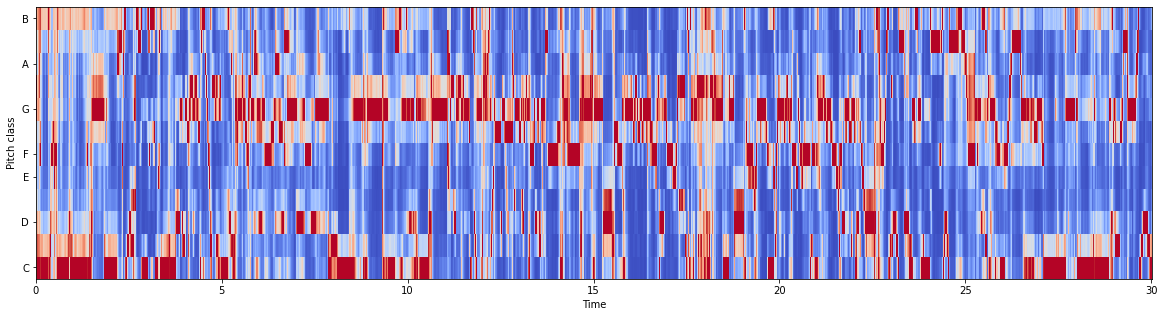

In [23]:
hop_length = 512  #The number of samples between successive frames, e.g., the columns of a spectrogram. This is denoted as a positive integer.

chromagram = librosa.feature.chroma_stft(signal, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [24]:
import pathlib, os

cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
  

  # Create a new directory at this given path. 
  # If the path already exists, FileExistsError is raised.
        # parameter details:

            # If parents is true, any missing parents of this path are created as needed;
            # they are created with the default permissions 

            # If exist_ok is true, FileExistsError exceptions will be ignored,
            # but only if the last path component is not an existing non-directory file.


    pathlib.Path(f'/content/genres/img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/genres/{g}'):
        songname = f'/content/genres/{g}/{filename}'
        
           # In librosa.load, we are loading anaudio file 

            # mono : bool
              # convert signal to mono

            # duration : float
              # only load up to this much audio (in seconds)

        y, sr = librosa.load(songname, mono=True, duration=5)

          # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html

        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'/content/genres/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf() # clears the entire current figure with all its axes, but leaves the window opened, such that it may be reused for other plots.

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


<Figure size 720x720 with 0 Axes>

In [25]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [26]:
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [27]:
import csv

file = open('audio_features.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'/content/genres/{g}'):
        songname = f'/content/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('audio_features.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [28]:
audio_features_df = pd.read_csv('/content/audio_features.csv')

In [29]:
audio_features_df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00019.wav,0.257259,0.097672,1195.411640,1481.284259,2234.878153,0.058871,-236.665344,138.409058,-4.903461,47.624584,5.179255,8.879488,0.507106,-3.818274,-14.977521,10.420425,-0.351182,0.777829,1.777306,4.235422,-0.463351,-6.105692,-5.382381,-1.337586,-3.719717,-4.353154,blues
1,blues.00038.wav,0.265883,0.168145,1513.422107,2140.606779,3449.679140,0.044378,-192.667175,111.190765,21.372723,26.398340,-0.646122,23.486736,-25.464550,16.937731,-16.977055,5.788635,-25.730206,-5.044726,-17.631821,-7.921688,-15.152404,-12.342546,-17.227766,-7.771727,-13.033959,-17.945749,blues
2,blues.00069.wav,0.291884,0.116570,2371.099278,2209.699346,5004.111407,0.125141,-121.408836,96.106079,-19.613255,48.011654,-38.798702,24.746748,-32.933586,8.099362,-17.798166,6.109449,-19.986544,6.793616,-19.333881,-0.114447,-12.250432,-4.927437,-10.409580,-2.049566,-1.768211,-3.962159,blues
3,blues.00077.wav,0.408876,0.243217,2206.771246,2191.473506,4657.388504,0.111526,-29.010990,104.532921,-30.974205,38.156387,-7.991166,30.888569,-20.597828,25.829105,-12.953564,16.941484,-12.265393,10.786453,-10.558811,6.877709,-10.294858,6.967845,-10.256100,0.705014,-6.000721,1.348955,blues
4,blues.00049.wav,0.277484,0.088607,1318.656822,1904.761177,3046.681577,0.039973,-255.965775,110.823044,21.505215,67.571228,4.299803,43.105457,-4.507725,10.423533,-8.694326,1.658149,-20.593155,-2.442929,-7.130865,-11.163918,-12.609408,2.742010,-8.948849,-7.940728,-2.344157,-0.705606,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00028.wav,0.442795,0.138850,2047.007626,2070.341468,4095.933566,0.101985,-92.605927,101.822586,-33.479839,48.712025,12.398143,20.820536,8.702456,9.283728,2.765335,5.246209,-9.339110,-3.484521,-4.357543,-4.655083,-3.968642,-3.122172,-7.003293,-0.394950,-1.151273,-6.009001,rock
996,rock.00014.wav,0.380442,0.053541,1935.576765,2007.518622,3983.150914,0.083594,-256.558136,103.162155,-8.459724,48.594051,-4.177533,17.337030,-6.665131,17.038212,-4.596627,5.318184,-10.013452,8.240795,-6.192268,3.438439,-3.646010,1.694156,-5.411558,-3.249125,-3.868790,-1.028208,rock
997,rock.00004.wav,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946869,134.443878,1.027332,54.440983,-0.464906,35.829540,-10.860896,16.383278,-10.030961,6.602061,-6.700005,11.043714,-8.385375,2.111019,-6.338261,0.997384,-5.325869,-0.842191,-4.665996,-4.787677,rock
998,rock.00031.wav,0.369164,0.126186,2638.972291,2512.459450,5302.242938,0.132472,-89.124443,81.379738,-12.579948,22.795282,-7.050183,-0.486549,2.778270,-3.426244,-7.708612,-0.844575,-4.886528,-2.684891,-5.289601,-4.601348,-2.971858,-2.206926,-3.565847,-0.996482,-0.496029,-0.964858,rock


Logistic regression